## Plot results

In [1]:
#set which GPU you wanna use
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
# os.environ["CUDA_VISIBLE_DEVICES"]='2' 

In [18]:
def build_results_df(folders):
    ''' Args-
        folders:  list of folders to look for the results json file in. Ex: ["results_*/", "backup/results_*/"] '''
    df = pd.DataFrame()
    for folder in folders:
        for jsonfile in glob(folder+"/scores_*.json"):
            row = pd.read_json(jsonfile, typ='series')
            # get the name of the model and add to df
            name = jsonfile.split("/")[-2].replace("results_","")
            row['model']=name
            df = df.append(row, ignore_index=True)
    df = df.set_index('model').sort_index()
    return df

def plot_results_df(df):
    # check if all columns exists, if not print warning and add column 
    for c in ["Conditioned_SSIM_mean", "MSE_mean", "MSE_std", "MSE_mean_prev_frame_copy", "MSE_std_prev_frame_copy",
            "MAE_mean", "MAE_std", "MAE_mean_prev_frame_copy", "MAE_std_prev_frame_copy",
            "SSIM_mean","SSIM_mean_prev_frame_copy", "SSIM_movement_mean", "SSIM_movement_mean_prev_frame_copy",
            "PSNR_mean", "PSNR_mean_prev_frame_copy", "PSNR_movement_mean", "PSNR_movement_mean_prev_frame_copy",
            "Sharpness_grad_mean", "Sharpness_mean", 
             #, "Sharpness_grad_mean_prev_frame_copy", "Sharpness_mean_prev_frame_copy"
             ]:
        if(c not in df.columns):
            print("WARNING:'{}' doesnot exist in any of the result*.json files".format(c))
            df[c] = 0
    
    f, axs = plt.subplots(9,2, figsize=(15,25), sharex=True)
    # 1) plot the MSE raw scores
    df.plot.bar(y=["MSE_mean", "MSE_mean_prev_frame_copy"], ax=axs[0,0]
                , yerr=df[["MSE_std", "MSE_std_prev_frame_copy"]].rename(columns={"MSE_std":"MSE_mean", "MSE_std_prev_frame_copy":"MSE_mean_prev_frame_copy"})
                , title="Mean square error", grid=True)
    axs[0,0].legend(["model MSE", "prev-frame-copy MSE"])
    
    # plot the MSE improvements
    (results["MSE_mean_prev_frame_copy"] - results["MSE_mean"]).plot(
        ax=axs[0,1], title="MSE improvement", grid=True, kind="bar")
    axs[0,1].axhline()
    
    # 2) plot the MAE raw scores
    df.plot.bar(y=["MAE_mean", "MAE_mean_prev_frame_copy"], ax=axs[1,0]
                , yerr=df[["MAE_std", "MAE_std_prev_frame_copy"]].rename(columns={"MAE_std":"MAE_mean", "MAE_std_prev_frame_copy":"MAE_mean_prev_frame_copy"})
                , title="Mean absolute error", grid=True)
    axs[1,0].legend(["model MAE", "prev-frame-copy MAE"])
    
    # plot the MSE improvements
    (results["MAE_mean_prev_frame_copy"] - results["MAE_mean"]).plot(
        ax=axs[1,1], title="MAE improvement", grid=True, kind="bar")
    axs[1,1].axhline()

    # 3) plot the SSIM scores
    df.plot.bar(y=["SSIM_mean", "SSIM_mean_prev_frame_copy"], ax=axs[2,0]
                , title="SSIM", grid=True)
    axs[2,0].legend(["model SSIM", "prev-frame-copy SSIM"])
    (results["SSIM_mean"] - results["SSIM_mean_prev_frame_copy"]).plot(
        ax=axs[2,1], title="SSIM improvement", grid=True, kind="bar")
    axs[2,1].axhline()
    
    # 4) plot SSIM scores for movement only
    df.plot.bar(y=["SSIM_movement_mean", "SSIM_movement_mean_prev_frame_copy"], ax=axs[3,0]
                , title="SSIM movement", grid=True)
    axs[3,0].legend(["model SSIM movement", "prev-frame-copy SSIM movement"])
    (results["SSIM_movement_mean"] - results["SSIM_movement_mean_prev_frame_copy"]).plot(
        ax=axs[3,1], title="SSIM movement improvement", grid=True, kind="bar")
    axs[3,1].axhline()
    
    # 5) plot conditioned SSIM scores
    df.plot.bar(y=["Conditioned_SSIM_mean"], ax=axs[4,0]
                , title="Conditioned SSIM", grid=True)
    axs[4,0].legend(["model conditioned SSIM"])
        
    # 6) plot the PSNR scores
    df.plot.bar(y=["PSNR_mean", "PSNR_mean_prev_frame_copy"], ax=axs[5,0]
                , title="PSNR", grid=True)
    axs[5,0].legend(["model PSNR", "prev-frame-copy PSNR"])
    (results["PSNR_mean"] - results["PSNR_mean_prev_frame_copy"]).plot(
        ax=axs[5,1], title="PSNR improvement", grid=True, kind="bar")
    axs[5,1].axhline()
    
    # 7) plot PSNR scores for movement only
    df.plot.bar(y=["PSNR_movement_mean", "PSNR_movement_mean_prev_frame_copy"], ax=axs[6,0]
                , title="PSNR movement", grid=True)
    axs[6,0].legend(["model PSNR movement", "prev-frame-copy PSNR movement"])
    (results["PSNR_movement_mean"] - results["PSNR_movement_mean_prev_frame_copy"]).plot(
        ax=axs[6,1], title="PSNR movement improvement", grid=True, kind="bar")
    axs[6,1].axhline()

    # 8) plot the sharpness - Gradient based
    df.plot.bar(y=["Sharpness_grad_mean"], ax=axs[7,0]
                , title="Gradient-based Sharpness", grid=True)
    axs[7,0].legend(["model gradient-based Sharpness"])
    #(results["Sharpness_grad_mean"] - results["Sharpness_grad_mean_prev_frame_copy"]).plot(
    #    ax=axs[7,1], title="Gradient-based sharpness improvement", grid=True, kind="bar")
    axs[7,1].axhline()
    
    # 9) plot sharpness - Fourier transform based
    df.plot.bar(y=["Sharpness_mean"], ax=axs[8,0]
                , title="Fourier-based Sharpness", grid=True)
    axs[8,0].legend(["model Fourier-based Sharpness"])
    #(results["Sharpness_mean"] - results["Sharpness_mean_prev_frame_copy"]).plot(
    #    ax=axs[8,1], title="Fourier-based sharpness improvement", grid=True, kind="bar")
    axs[8,1].axhline()
    plt.xticks(rotation='vertical')
    
   
    plt.tight_layout()    

In [19]:
results = build_results_df(["../../roshan/Predictive-video-classification/prednet-smth-smth/results_*/"])#, "prednet-smth-smth/backup/results_*/"
display(results)

,MAE_mean,MAE_mean_prev_frame_copy,MAE_std,MAE_std_prev_frame_copy,MSE_mean,MSE_mean_prev_frame_copy,MSE_std,MSE_std_prev_frame_copy,PRNS_mean,PRNS_mean_prev_frame_copy,...,Sharpness_mean,Sharpness_mean_prev_frame_copy,Conditioned_SSIM_mean,PSNR_mean,PSNR_mean_prev_frame_copy,PSNR_movement_mean,SSIM_movement_mean,SSIM_movement_mean_prev_frame_copy,Sharpness_grad_mean,Sharpness_grad_mean_prev_frame_copy
model,,,,,,,,,,,,,,,,,,,,,
fps12_l4_img32_48_450k,NaN,NaN,NaN,NaN,0.005965,0.008671,0.000694,0.001065,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l4_img48_56_450k,NaN,NaN,NaN,NaN,0.005977,0.009166,0.000774,0.001247,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l5_img48_80_750k_p5m,NaN,NaN,NaN,NaN,0.005386,0.008478,0.000630,0.000968,25.907493,24.409018,...,27.899784,36.553362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l5_img48_80_900k_p11m,0.034508,0.039372,0.002444,0.003004,0.005526,0.008486,0.000637,0.001016,25.715538,24.417400,...,27.814926,36.556676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l5_lall_img48_80_750k_p5m,0.036838,0.039481,0.002747,0.003118,0.006504,0.008507,0.000752,0.001015,25.261958,24.405437,...,28.106207,36.553473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l6_img64_96_750k_p6m,0.034135,0.040177,0.002373,0.002936,0.005456,0.008717,0.000630,0.001003,25.830234,24.302378,...,26.406756,35.509561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l6_img64_96_nopool_750k_p7m,0.033783,0.040084,0.002401,0.003028,0.005443,0.008705,0.000652,0.001059,NaN,NaN,...,NaN,NaN,0.146348,25.937680,24.382214,25.771230,0.860001,0.821889,26.115998,35.509871
fps12_l6_img96_160_750k_p7m,0.031733,0.039442,0.002946,0.003926,0.004924,0.008486,0.000756,0.001311,26.376134,24.384091,...,21.917274,32.076141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fps12_l6_img96_160_nopool_750k_p8m,0.032501,0.039230,0.003560,0.004523,0.005150,0.008433,0.000895,0.001453,NaN,NaN,...,NaN,NaN,0.132978,26.212469,24.489418,26.071041,0.866106,0.826810,21.889748,32.101029


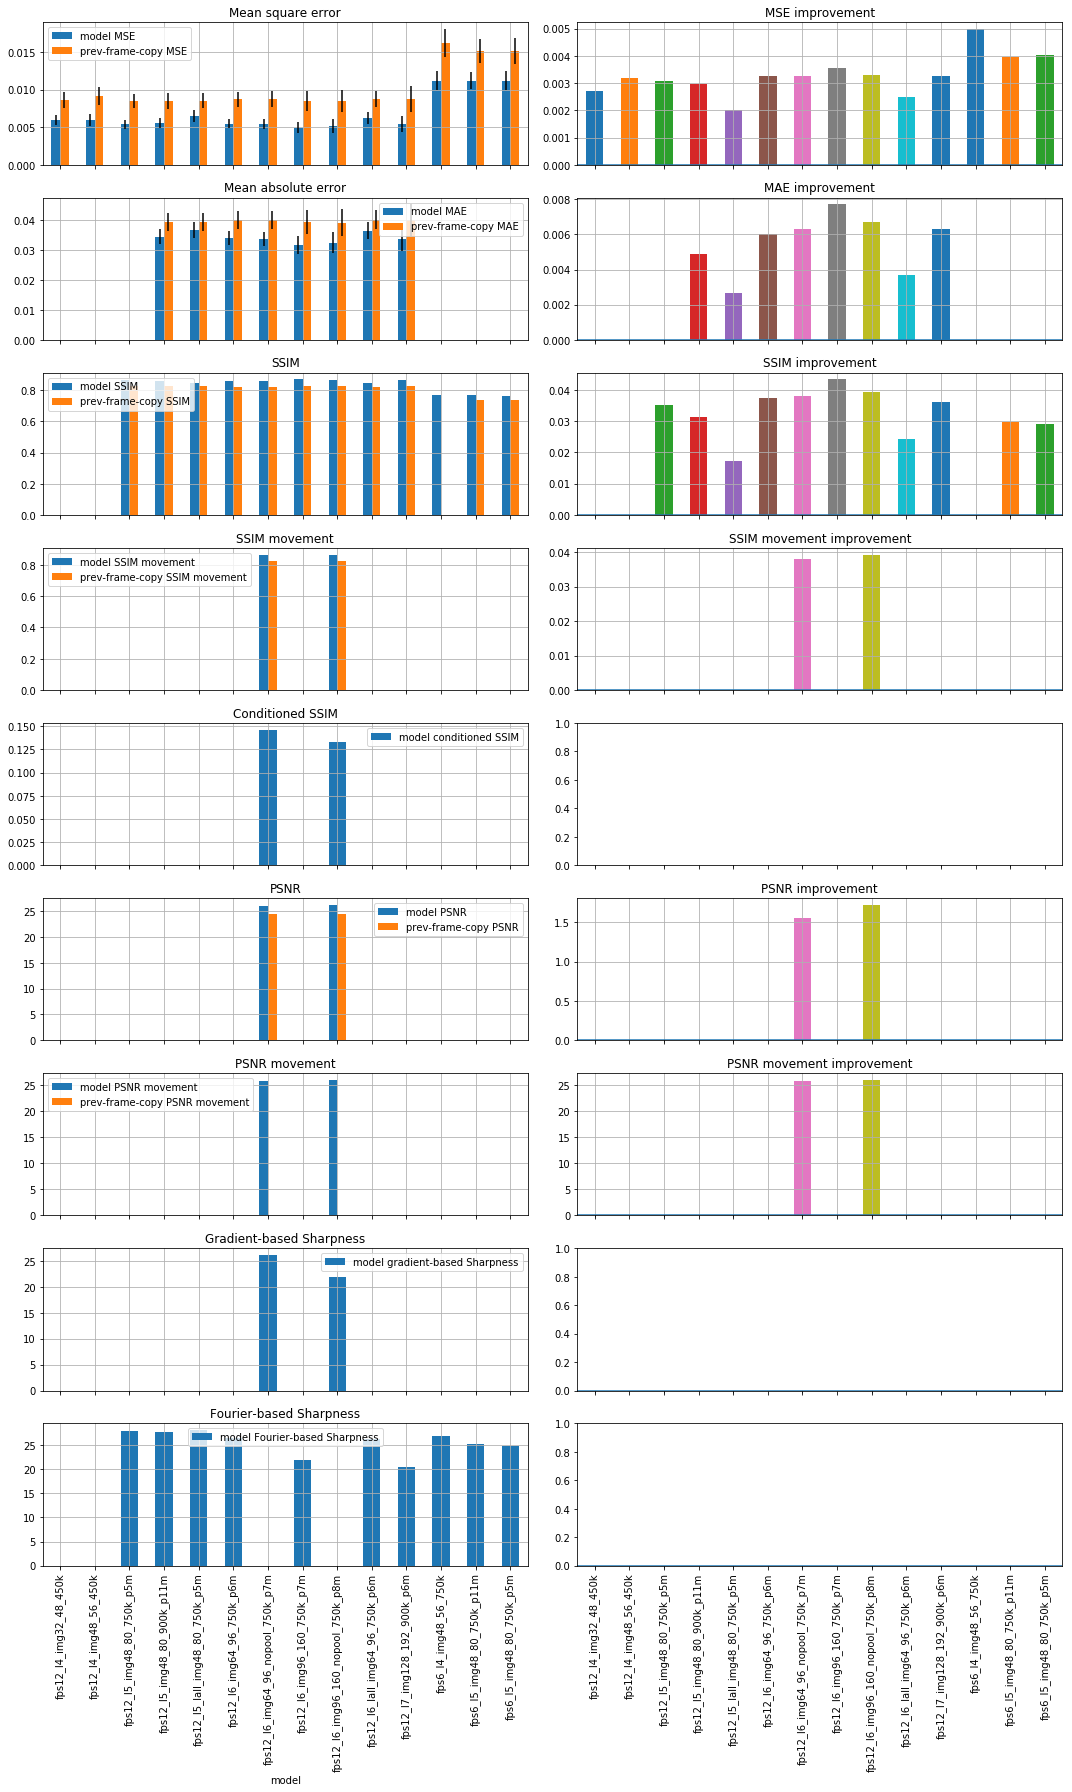

In [20]:
plot_results_df(results)

1. Edit fixes issues in the metrics  
  a. Sharpness implementation recheck    
2. Vageesh : add Extrapolation-based metric in eval mode
3. Vageesh : Collect all trained models in one directory and write a bash script to re-run the eval for all models in the directory (--test_samples 5000) 
4. Edit/Vageesh : Select the best metric by visual comparing predicted image qualities